In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/web-traffic-analysis/Thecleverprogrammer.csv


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

data = pd.read_csv("/kaggle/input/web-traffic-analysis/Thecleverprogrammer.csv")
print(data.head())

         Date  Views
0  01/06/2021   7831
1  02/06/2021   7798
2  03/06/2021   7401
3  04/06/2021   7054
4  05/06/2021   7973


In [10]:
data["Date"] = pd.to_datetime(data["Date"], 
                              format="%d/%m/%Y")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB
None


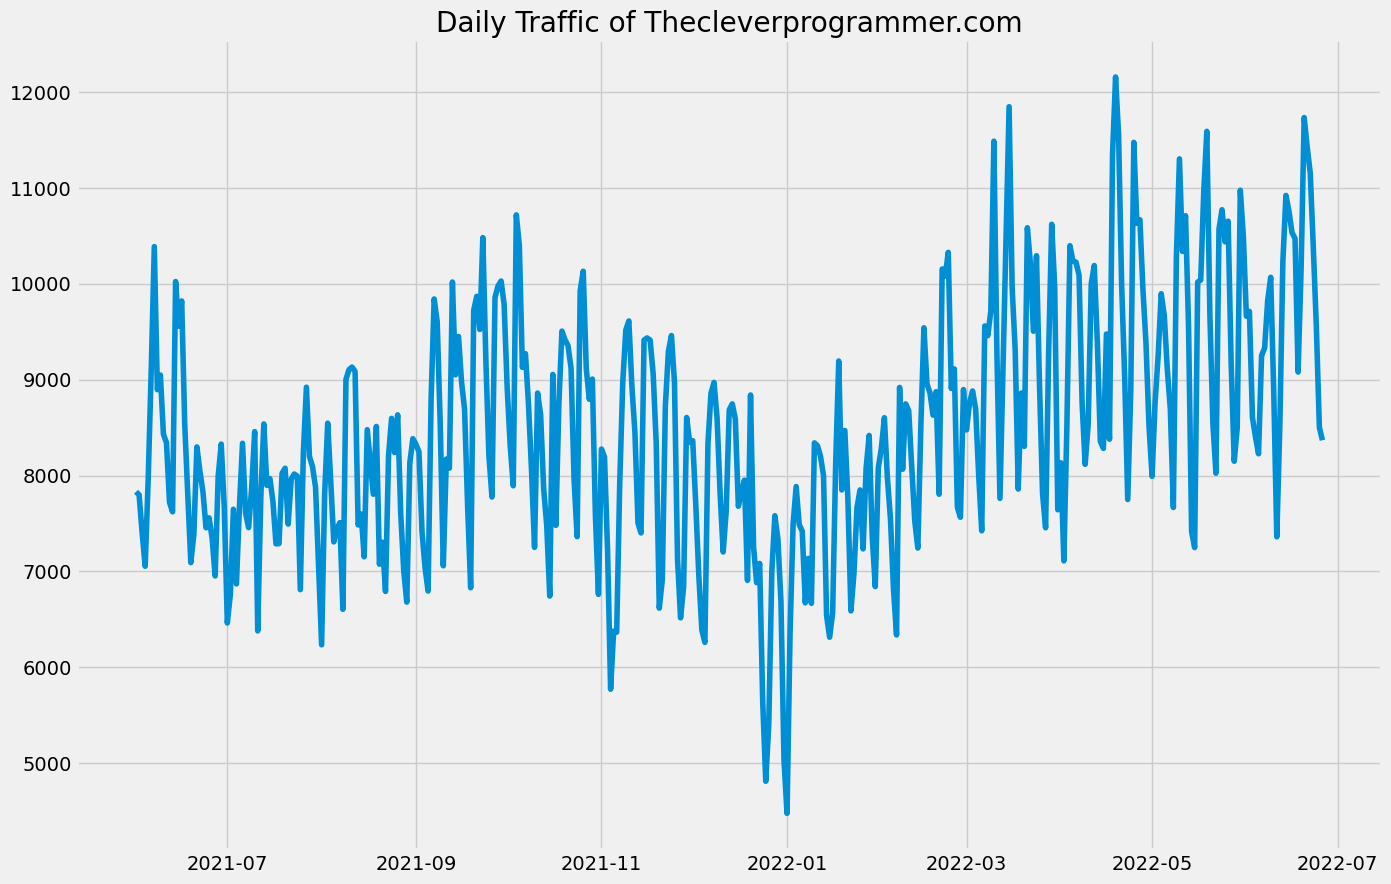

In [11]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Views"])
plt.title("Daily Traffic of Thecleverprogrammer.com")
plt.show()

In [15]:
result = seasonal_decompose(data["Views"],
                            model='multiplicative'
                            ,freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

TypeError: seasonal_decompose() got an unexpected keyword argument 'freq'

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

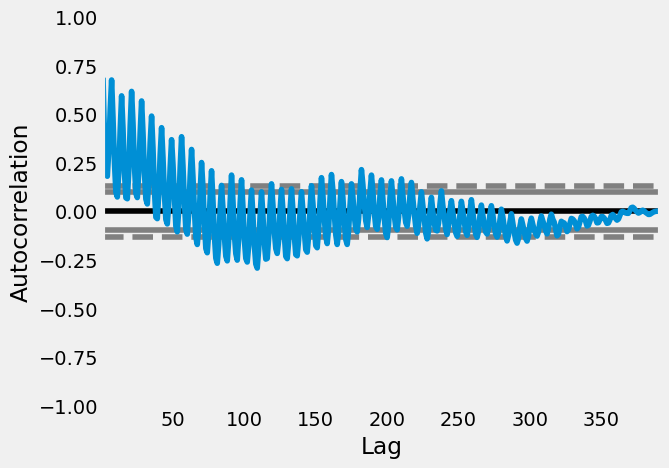

In [16]:
pd.plotting.autocorrelation_plot(data["Views"])

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


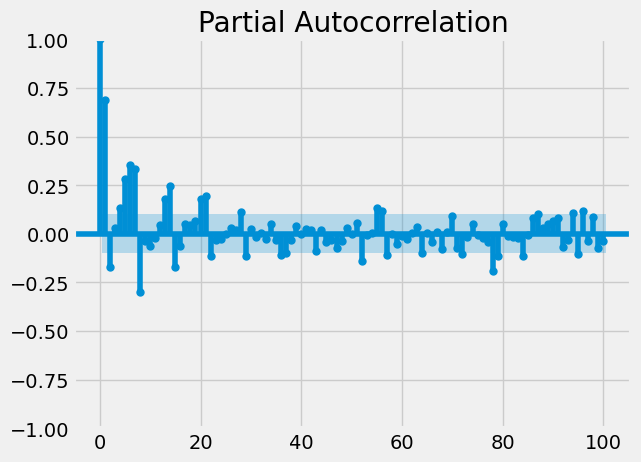

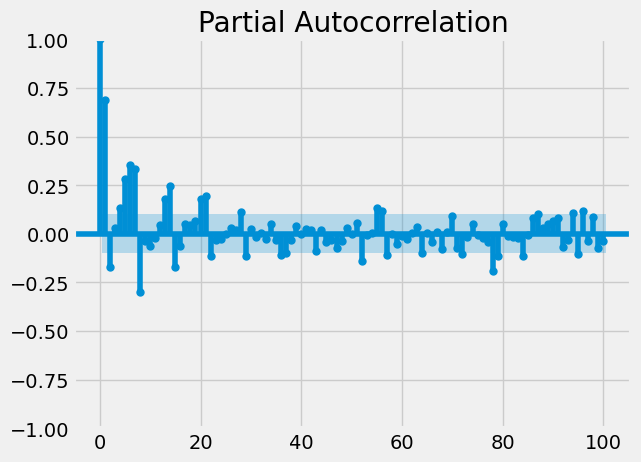

In [17]:
plot_pacf(data["Views"], lags = 100)

In [18]:
p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(data['Views'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.26940D+00    |proj g|=  5.28062D-01

At iterate    5    f=  8.06764D+00    |proj g|=  4.51780D-02

At iterate   10    f=  8.01428D+00    |proj g|=  4.59156D-02

At iterate   15    f=  7.98073D+00    |proj g|=  1.14090D-01

At iterate   20    f=  7.96097D+00    |proj g|=  1.73117D-02

At iterate   25    f=  7.95078D+00    |proj g|=  2.22031D-01

At iterate   30    f=  7.94314D+00    |proj g|=  1.85832D-01

At iterate   35    f=  7.93774D+00    |proj g|=  1.40969D-02

At iterate   40    f=  7.93366D+00    |proj g|=  2.85797D-02

At iterate   45    f=  7.92967D+00    |proj g|=  7.38372D-02

At iterate   50    f=  7.92663D+00    |proj g|=  1.71607D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.314
Date:                            Thu, 02 Mar 2023   AIC                           6228.627
Time:                                    06:57:20   BIC                           6287.651
Sample:                                         0   HQIC                          6252.053
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7689      0.131      5.871      0.000       0.512       1.026
ar.L2         -0.7888      0.134   

In [19]:
predictions = model.predict(len(data), len(data)+50)
print(predictions)

391     9861.518304
392    10811.054233
393    10761.006963
394     9838.547006
395     8760.780673
396     8238.397286
397     8932.891533
398     9709.212642
399    10281.788166
400    10615.655649
401     9863.780437
402     9346.913143
403     9024.430704
404     9072.610142
405    10540.514637
406    11014.199543
407    10911.164760
408    10102.556289
409     9448.115080
410     8623.531437
411     9169.930735
412    10390.581602
413    10634.009997
414    10796.609701
415    10251.352280
416     9446.881181
417     9014.379456
418     9146.317214
419     9911.834860
420    10265.790364
421    10732.682024
422     9912.320281
423     9536.103042
424     9020.913631
425     8814.729366
426    10139.922848
427    10860.584623
428    10910.612452
429    10395.056780
430     9432.669669
431     8668.834264
432     8707.095985
433    10070.058513
434    10527.480232
435    10845.056137
436    10472.409020
437     9339.505170
438     9163.903631
439     9350.973305
440    10303.990154


<AxesSubplot:>

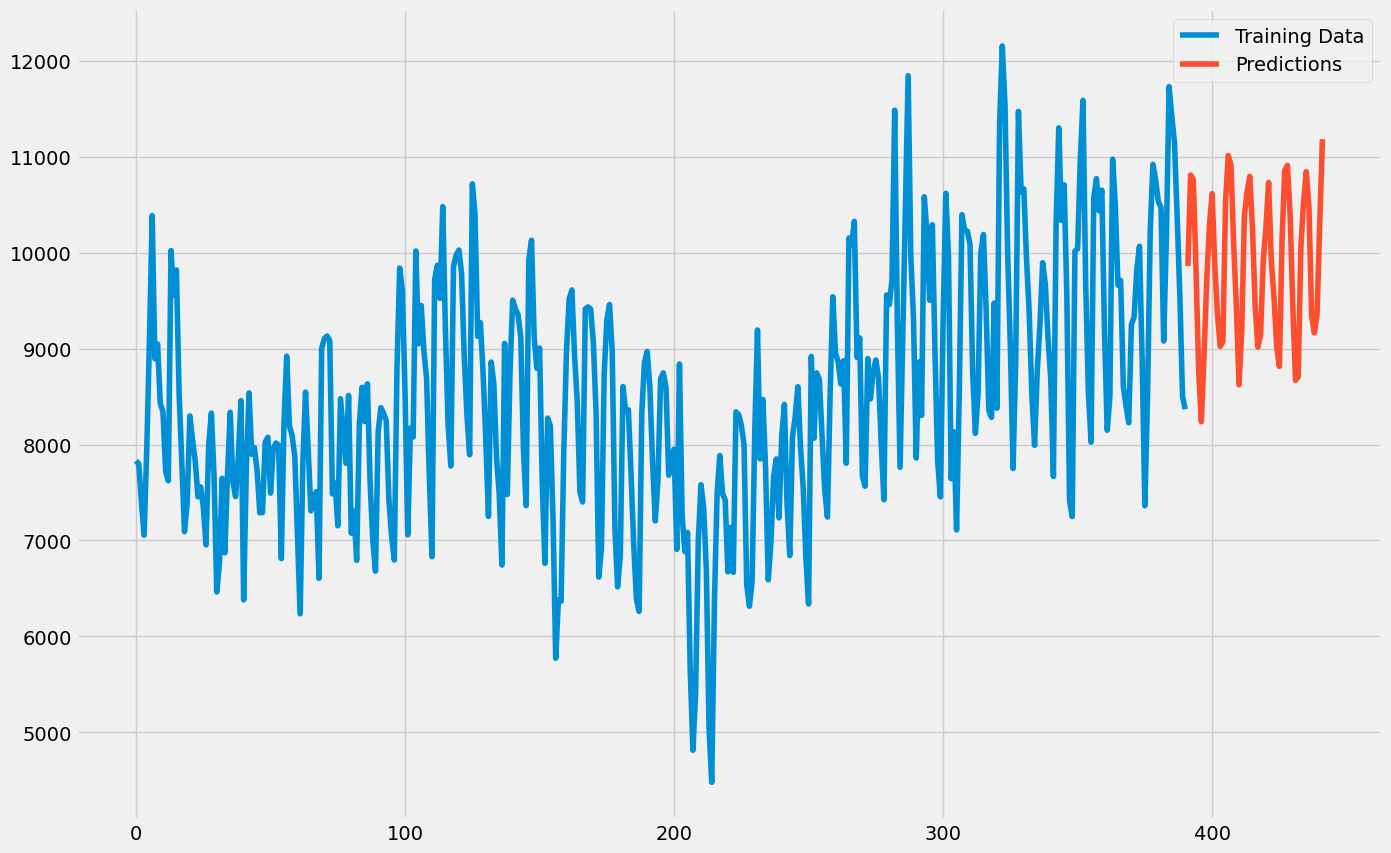

In [20]:
data["Views"].plot(legend=True, label="Training Data", 
                   figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")